# Задание 2

Построить свою модель линейной регрессии на основе библиотеки sklearn с датасетом

In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [52]:
data = pd.read_csv("/content/db_LinearRegression.txt", sep="\t", header=None, names=['x','y'])
x = np.array(data['x']).reshape((-1, 1))
y = np.array(data['y'])

In [53]:
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Проверим модель через метрику R² - коэффициент детерминации, доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными.

In [54]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

# возвращают значения коэффициентов прямой 
# без непосредственного задания пользователем формул метода наименьших квадратов
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8333466719794502
intercept: 19.994485759114824
slope: [3.41382356]


.intercept_, который представляет собой коэффициент, и b₀ с .coef_, которые представляют b₁

In [55]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[388.68743025  84.8571334   64.37419204 443.30860721 156.54742816
 214.58242868  98.51242764  67.7880156  173.61654596  54.13272136
  37.06360356 183.85801664  57.54654492  98.51242764  43.89125068
  26.82213288 101.9262512   40.47742712  30.23595644  98.51242764
  40.47742712  50.7188978   50.7188978   30.23595644 118.995369
  43.89125068  33.64978     88.27095696  43.89125068  33.64978
  19.99448576 105.34007476  40.47742712  37.06360356  95.09860408
  57.54654492 228.23772292  60.96036848  33.64978     74.61566272
  64.37419204 224.82389936 159.96125172 146.30595748 207.75478156
 159.96125172  57.54654492 112.16772188  47.30507424  30.23595644
  78.02948628  64.37419204  64.37419204  71.20183916  47.30507424
 118.995369   122.40919256 101.9262512   50.7188978  125.82301612
  67.7880156  200.92713444 108.75389832]


In [56]:
y = np.asarray(y)
y

array([392.5,  46.2,  15.7, 422.2, 119.4, 170.9,  56.9,  77.5, 214. ,
        65.3,  20.9, 248.1,  23.5,  39.6,  48.8,   6.6, 134.9,  50.9,
         4.4, 113. ,  14.8,  48.7,  52.1,  13.2, 103.9,  77.5,  11.8,
        98.1,  27.9,  38.1,   0. ,  69.2,  14.6,  40.3, 161.5,  57.2,
       217.6,  58.1,  12.6,  59.6,  89.9, 202.4, 181.3, 152.8, 162.8,
        73.4,  21.3,  92.6,  76.1,  39.9, 142.1,  93. ,  31.9,  32.1,
        55.6, 133.3, 194.5, 137.9,  87.4, 209.8,  95.5, 244.6, 187.5])

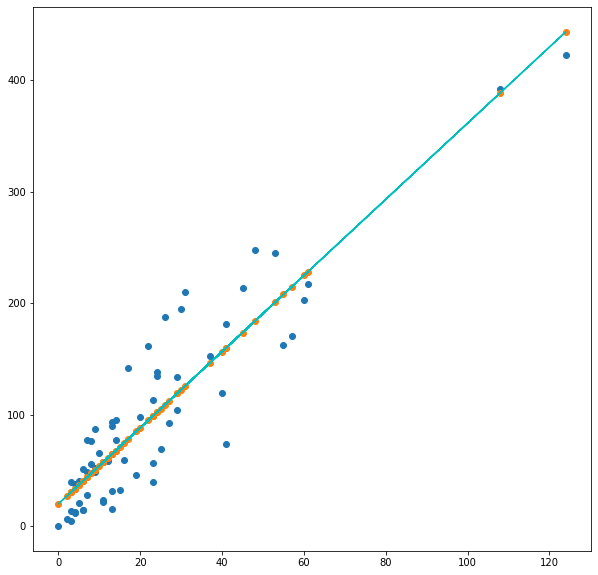

In [63]:
import matplotlib.pyplot as plt

func = lambda x: model.intercept_ + model.coef_[0]*x

plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.plot(x, func(x), 'c')
plt.show()

# Задание 3

Реализовать Наивный Баесовский классификатор с помощью sklearn и попробовать на датасете

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [68]:
db = pd.read_csv("/content/db_sms_SpamCollection.txt", sep="\t", header=None, names=['target','data'])
db.head()

,target,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [69]:
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target, test_size=0.25)

In [75]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_predict = mnb.predict(X_test)

print('The Accuracy of Naive Bayes:', mnb.score(X_test, y_test))
print(classification_report(y_test, y_predict))

The Accuracy of Naive Bayes: 0.9849246231155779
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1222
        spam       0.97      0.90      0.94       171

    accuracy                           0.98      1393
   macro avg       0.98      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [90]:
count = 0
y_test = list(y_test)

for i in range(len(y_predict)):
  if y_predict[i] == y_test[i]:
    count = count + 1

print("The count of coincidences: {0}".format(count))

The count of coincidences: 1372
